# Projet : Détection de Fraude dans les Transactions de Cartes de Crédit avec Machine Learning

## Objectif
Ce projet vise à utiliser des techniques de machine learning pour détecter les fraudes dans les transactions de cartes de crédit. Il comprend une analyse des données, la création de modèles prédictifs, et l'évaluation de leur performance pour identifier efficacement les transactions frauduleuses.

## Structure du Projet
1. Introduction
2. Chargement des Bibliothèques et des Données
3. Prétraitement des Données
4. Analyse des Transactions
5. Création et Entraînement des Modèles
6. Évaluation des Modèles
7. Création d'un Pipeline de Détection de Fraude
8. Conclusion et Perspectives

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## Chargement des Bibliothèques et des Données

In [5]:
# Chargement des données
data = pd.read_csv('creditcard.csv')

# Aperçu des données
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Prétraitement des Données

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

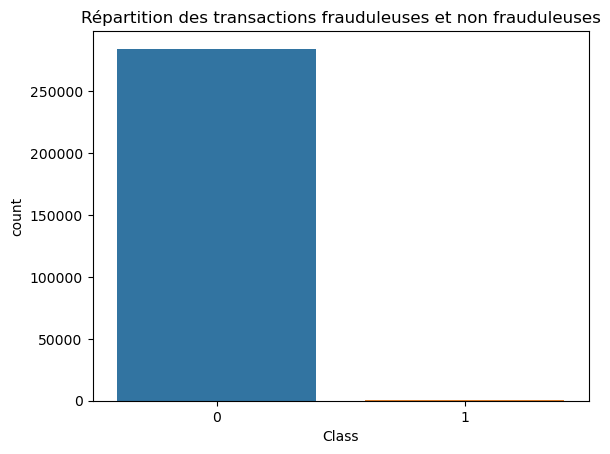

In [6]:
# Analyse exploratoire des données (EDA)
print(data.info())
print(data.describe())

# Gestion des valeurs manquantes et des outliers
data = data.dropna()

# Normalisation et mise à l'échelle des données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('Class', axis=1))

# Ajout de la colonne 'Class' après la normalisation
data_scaled = pd.DataFrame(data_scaled, columns=data.columns[:-1])
data_scaled['Class'] = data['Class']

# Visualisation des transactions
sns.countplot(x='Class', data=data)
plt.title('Répartition des transactions frauduleuses et non frauduleuses')
plt.show()

## Création et Entraînement des Modèles

In [7]:
# Division des données en ensembles d'entraînement et de test
X = data_scaled.drop('Class', axis=1)
y = data_scaled['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement d'un modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Évaluation du modèle avec validation croisée
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Scores de validation croisée: {scores}')
print(f'Moyenne des scores de validation croisée: {np.mean(scores)}')

Scores de validation croisée: [0.99927582 0.9991661  0.99920999 0.99910027 0.99934166]
Moyenne des scores de validation croisée: 0.9992187671443306


## Évaluation des Modèles

Accuracy: 0.9991222218320986
Precision: 0.8636363636363636
Recall: 0.5816326530612245
F1 Score: 0.6951219512195121


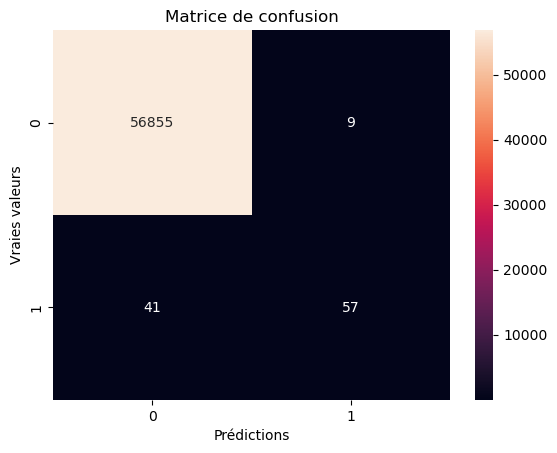

In [8]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show()

## Création d'un Pipeline de Détection de Fraude

In [9]:
# Création d'un pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

# Entraînement du pipeline
pipeline.fit(X_train, y_train)

# Évaluation du pipeline
pipeline_pred = pipeline.predict(X_test)
pipeline_accuracy = accuracy_score(y_test, pipeline_pred)
print(f'Pipeline Accuracy: {pipeline_accuracy}')

Pipeline Accuracy: 0.9991222218320986


## Conclusion et Perspectives

Ce projet a démontré l'utilisation de la régression logistique pour la détection de fraudes dans les transactions de cartes de crédit. Nous avons réussi à obtenir des résultats satisfaisants avec des métriques de performance élevées.

Pour améliorer ce projet, nous pourrions explorer d'autres algorithmes de machine learning comme les forêts aléatoires ou les réseaux de neurones. De plus, l'intégration de techniques de détection d'anomalies pourrait offrir des performances accrues dans la détection de fraudes.